In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "RDY"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-07-15,8.500,8.665,8.500,8.635,7.354088,1599800
2004-07-16,8.800,8.850,8.675,8.675,7.388154,501200
2004-07-19,8.685,8.755,8.535,8.570,7.298730,179600
2004-07-20,8.600,8.800,8.600,8.710,7.417961,534400
2004-07-21,8.750,8.780,8.560,8.560,7.290214,415400


In [6]:
google_data.shape

(5033, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,37.101411,37.401509,36.791428,37.100555,34.860736,2.944228e+05
std,18.490071,18.590870,18.393135,18.489035,18.521929,2.364254e+05
min,7.470000,7.625000,7.270000,7.410000,6.421519,3.470000e+04
25%,17.730000,17.889999,17.480000,17.610001,15.227860,1.627000e+05
50%,36.770000,37.099998,36.410000,36.750000,34.095531,2.356000e+05
75%,51.799999,52.290001,51.270000,51.740002,49.186710,3.500000e+05
max,79.309998,80.139999,79.309998,79.589996,79.589996,5.000200e+06


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-07-15 to 2024-07-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [63]:
correlation_matrix = google_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          Open      High       Low     Close  Adj Close  \
Open                  1.000000  0.999881  0.999837  0.999758   0.998275   
High                  0.999881  1.000000  0.999817  0.999876   0.998332   
Low                   0.999837  0.999817  1.000000  0.999893   0.998450   
Close                 0.999758  0.999876  0.999893  1.000000   0.998478   
Adj Close             0.998275  0.998332  0.998450  0.998478   1.000000   
Volume               -0.199244 -0.197205 -0.204721 -0.201603  -0.207962   
MA_for_250_days       0.950110  0.950154  0.950033  0.949927   0.954402   
MA_for_100_days       0.980537  0.980514  0.980297  0.980224   0.982844   
percentage_change_cp -0.005110  0.001185  0.003364  0.008010   0.007069   

                        Volume  MA_for_250_days  MA_for_100_days  \
Open                 -0.199244         0.950110         0.980537   
High                 -0.197205         0.950154         0.980514   
Low                  -0.2

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of RDY data')

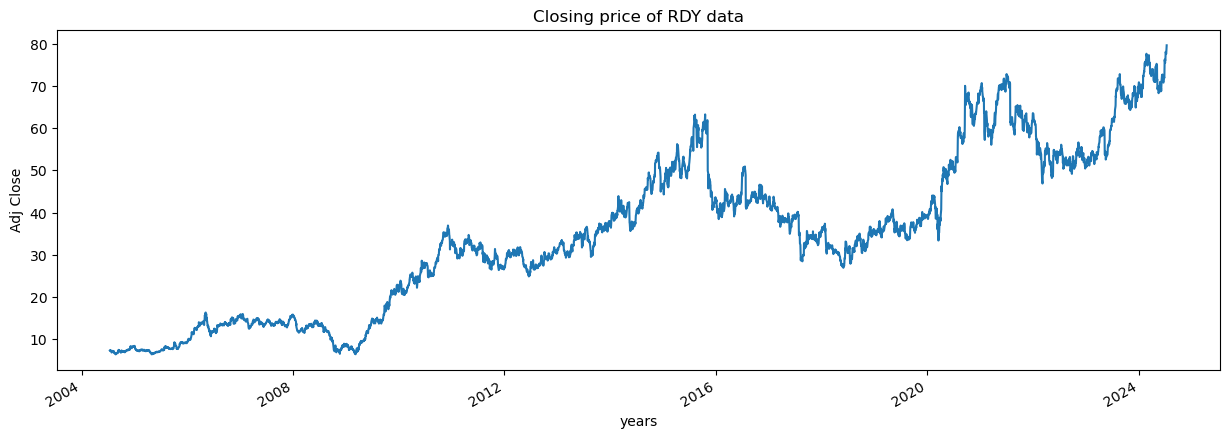

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of RDY data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of RYD data")

In [13]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

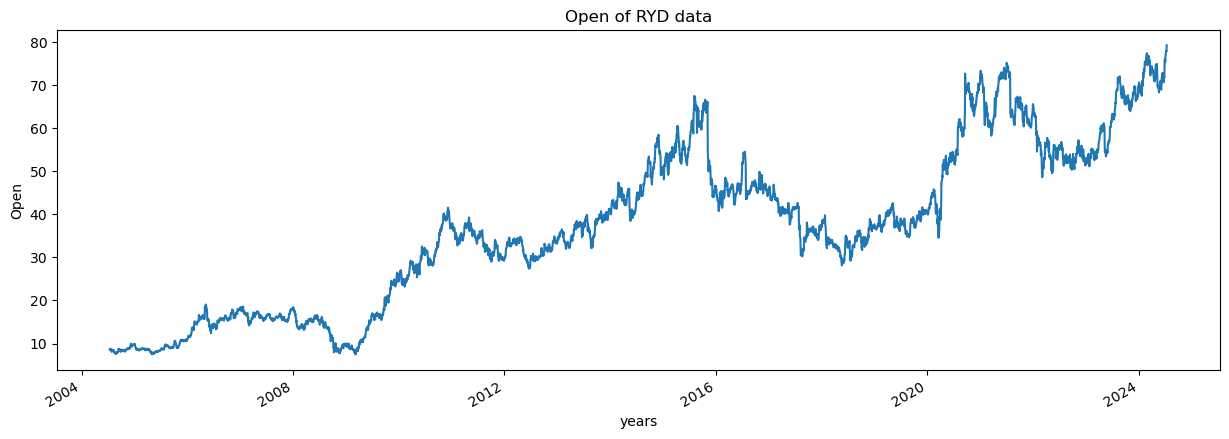

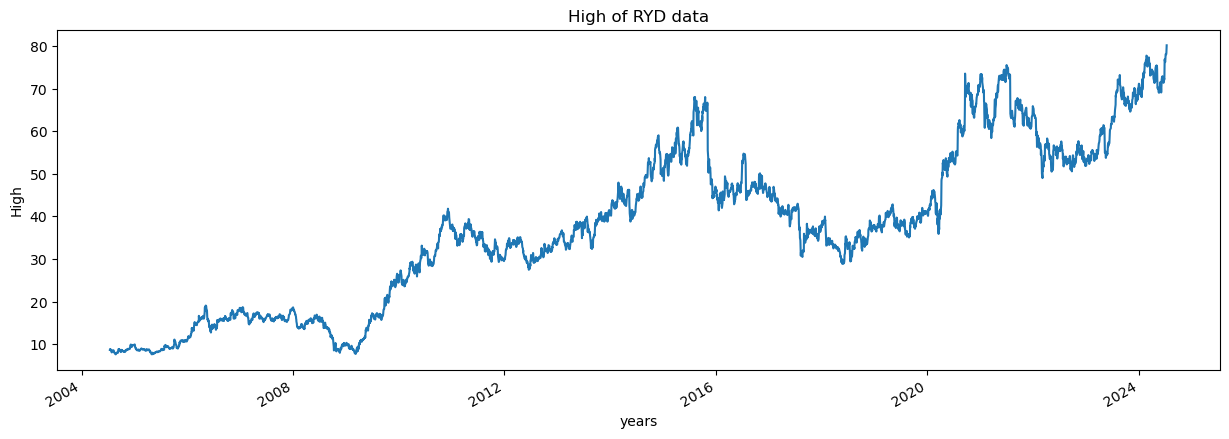

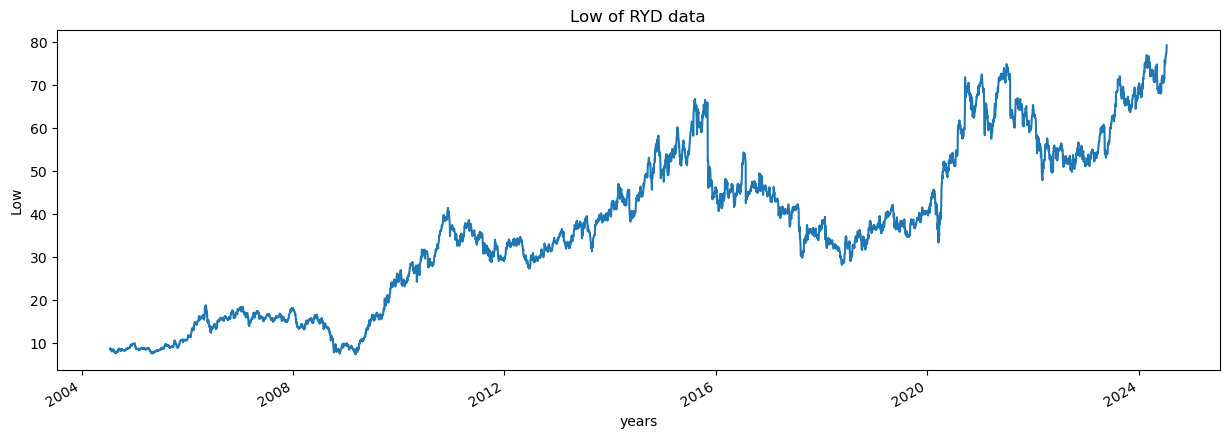

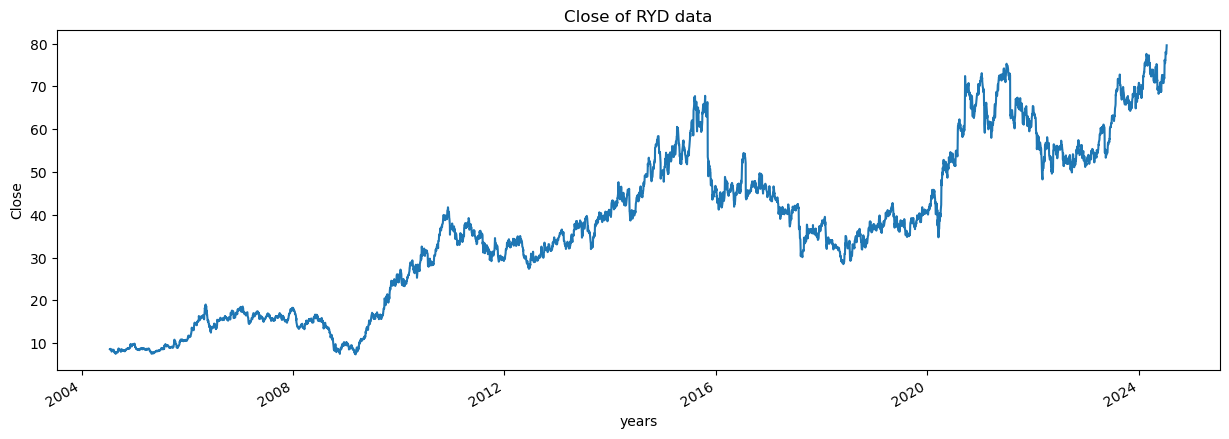

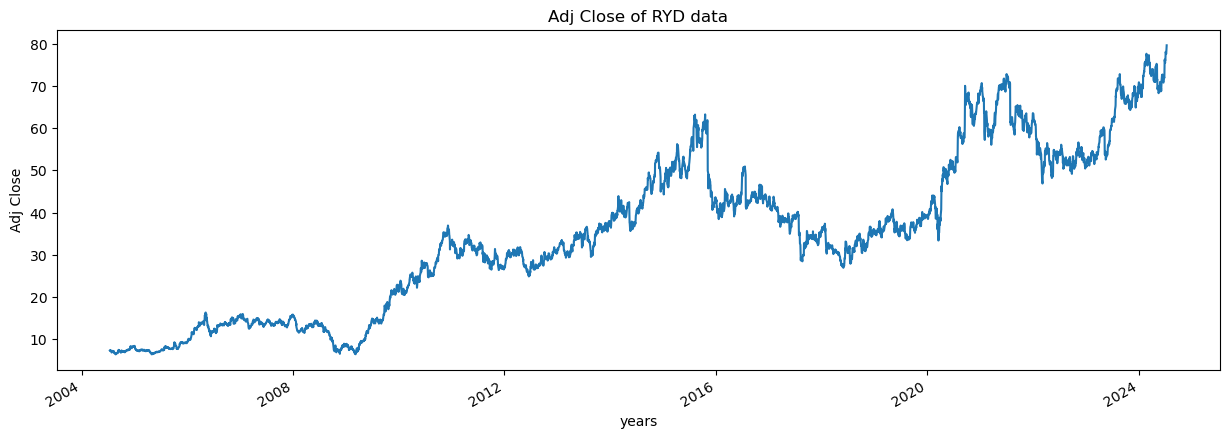

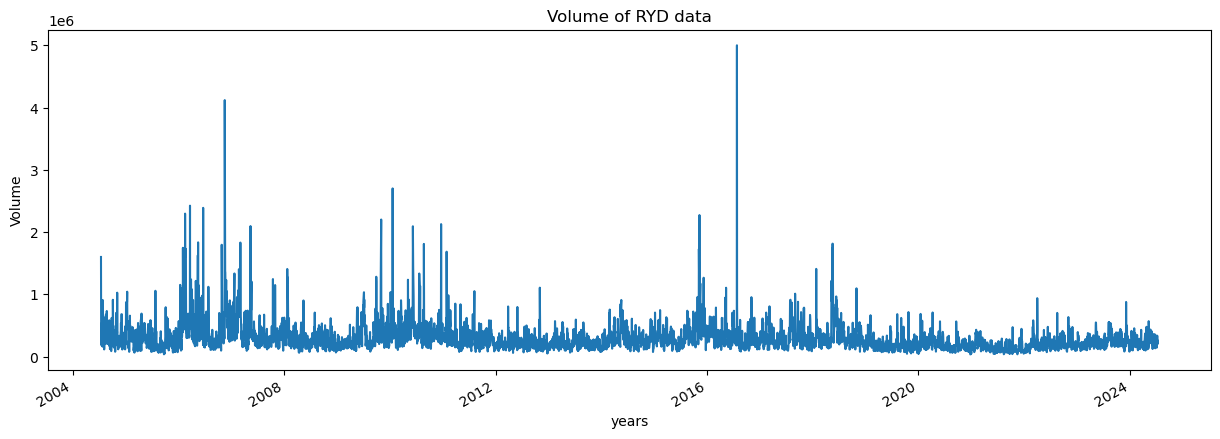

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 119
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 133


In [20]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [61]:
correlation = google_data['Open'].corr(google_data['Close'])

In [62]:
print(f"Pearson correlation coefficient between Open and Close prices: {correlation:.2f}")

Pearson correlation coefficient between Open and Close prices: 1.00


In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-07-05         NaN
2005-07-06         NaN
2005-07-07         NaN
2005-07-08         NaN
2005-07-11    7.251967
Name: MA_for_250_days, dtype: float64

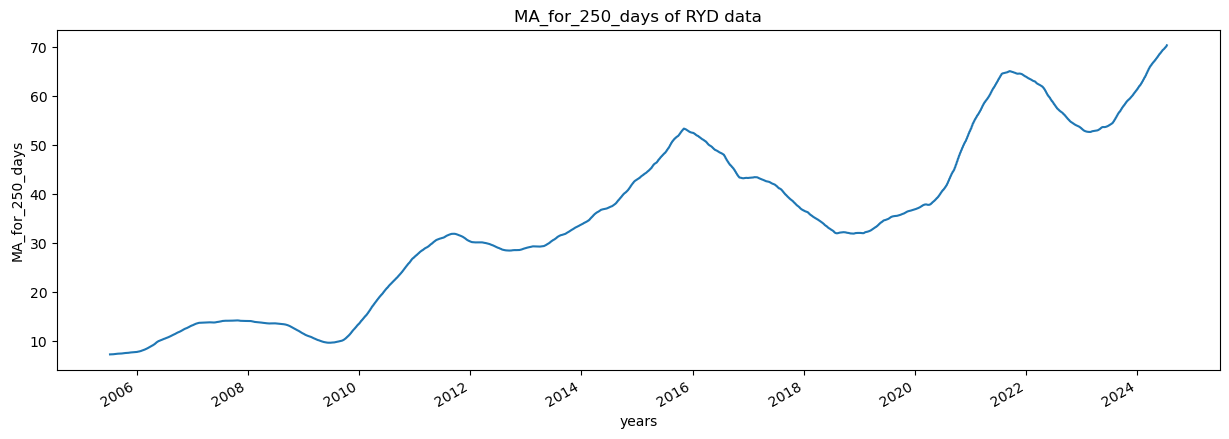

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

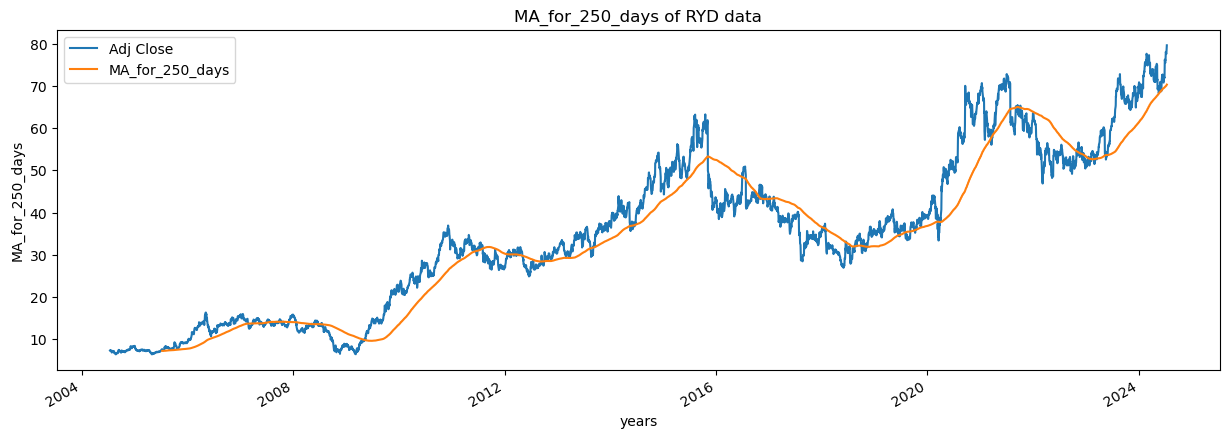

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

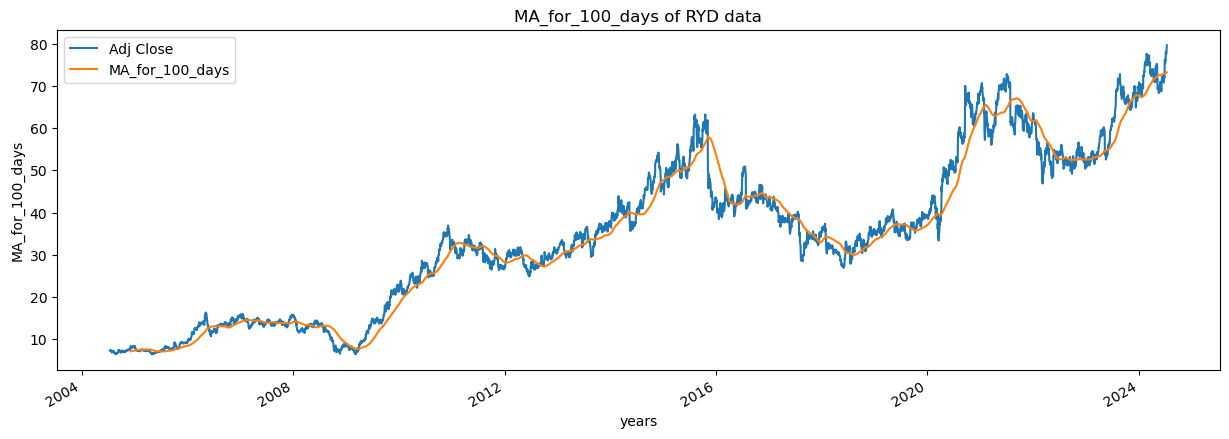

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

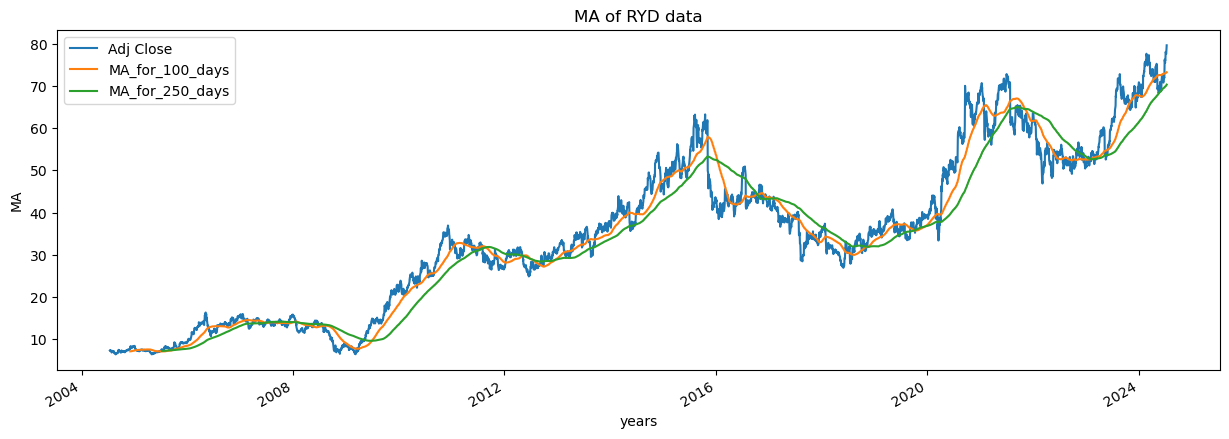

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-07-15,7.354088,NaN
2004-07-16,7.388154,0.004632
2004-07-19,7.298730,-0.012104
2004-07-20,7.417961,0.016336
2004-07-21,7.290214,-0.017221


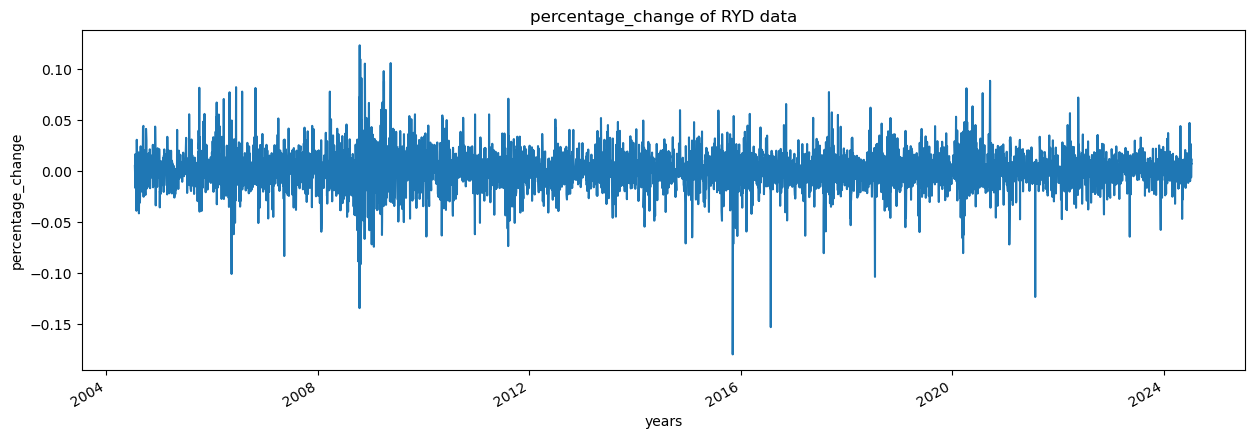

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([79.58999634]), array([6.42151928]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.0127455 ],
       [0.01321108],
       [0.01198891],
       ...,
       [0.98127616],
       [0.988383  ],
       [1.        ]])

In [31]:
len(scaled_data)

5033

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
import pandas as pd
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[0.0127455 ],
        [0.01321108],
        [0.01198891],
        [0.01361846],
        [0.01187252],
        [0.01181431],
        [0.01012655],
        [0.00995196],
        [0.00611086],
        [0.00646005],
        [0.00931178],
        [0.01082494],
        [0.01134873],
        [0.01088315],
        [0.00907898],
        [0.00797321],
        [0.00884619],
        [0.00936999],
        [0.01111594],
        [0.01030115],
        [0.00820601],
        [0.00419031],
        [0.00442309],
        [0.00471409],
        [0.00547067],
        [0.00512149],
        [0.00221154],
        [0.00157136],
        [0.        ],
        [0.00209514],
        [0.00192056],
        [0.00314274],
        [0.00325914],
        [0.00419031],
        [0.00535427],
        [0.00552888],
        [0.00360833],
        [0.00395752],
        [0.00430669],
        [0.00634366],
        [0.01035934],
        [0.01466604],
        [0.0120471 ],
        [0.01088315],
        [0.01187252],
        [0

In [34]:
int(len(x_data)*0.7)

3453

In [35]:
4908-100-int(len(x_data)*0.7)

1355

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/Users/vermashubham/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 74s 21ms/step - loss: 0.0015
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 71s 21ms/step - loss: 3.0367e-04


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [44]:
predictions

array([[0.3684258 ],
       [0.37018666],
       [0.37178528],
       ...,
       [1.0033504 ],
       [1.0111976 ],
       [1.0199133 ]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[33.378674],
       [33.50751 ],
       [33.62448 ],
       ...,
       [79.83514 ],
       [80.4093  ],
       [81.04702 ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[33.21438217],
       [33.33831787],
       [33.33831787],
       ...,
       [78.22000122],
       [78.73999786],
       [79.58999634]])

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [48]:
rmse

1.590530234505379

In [49]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-08-23,33.214382,33.378674
2018-08-24,33.338318,33.507511
2018-08-27,33.338318,33.624481
2018-08-28,33.090446,33.646366
2018-08-29,32.394505,33.441322


In [50]:
# Calculate MAPE
mape = np.mean(np.abs((ploting_data['original_test_data'] - ploting_data['predictions']) / ploting_data['original_test_data'])) * 100

In [51]:
print(f"MAPE: {mape:.2f}%")

MAPE: 2.31%


In [59]:
correlation = ploting_data['original_test_data'].corr(ploting_data['predictions'])

In [60]:
print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 1.00


In [52]:
# Calculate R-squared
ss_total = np.sum((ploting_data['original_test_data'] - np.mean(ploting_data['original_test_data'])) ** 2)
ss_residual = np.sum((ploting_data['original_test_data'] - ploting_data['predictions']) ** 2)
r_squared = 1 - (ss_residual / ss_total)

In [53]:
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.98


In [54]:
mape_value = np.mean(np.abs((ploting_data['original_test_data'] - ploting_data['predictions']) / ploting_data['original_test_data']))
accuracy = (1 - mape_value) * 100

In [55]:
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.69%


<Figure size 640x480 with 0 Axes>

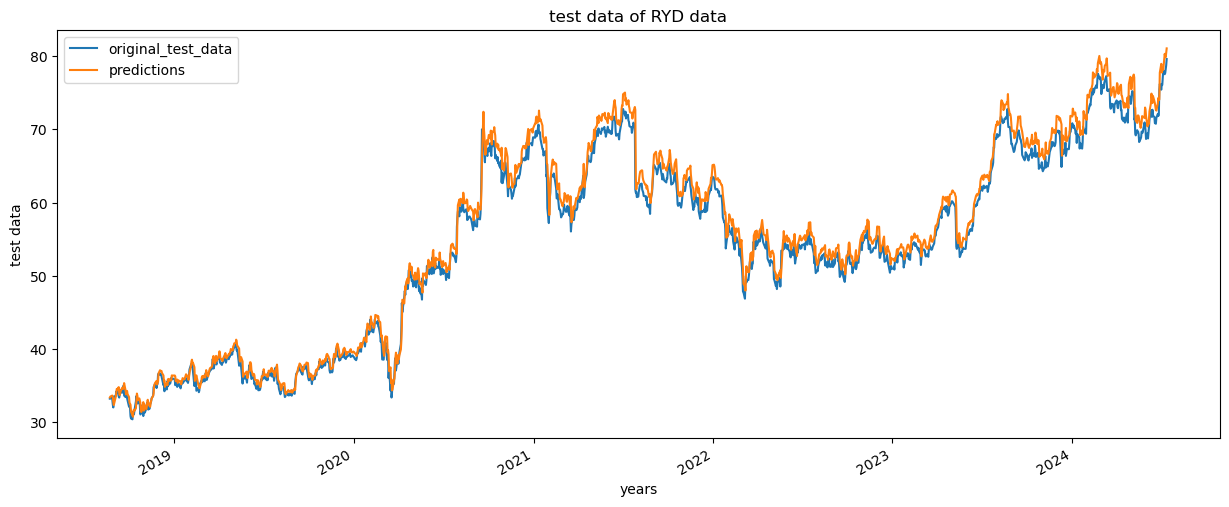

In [56]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

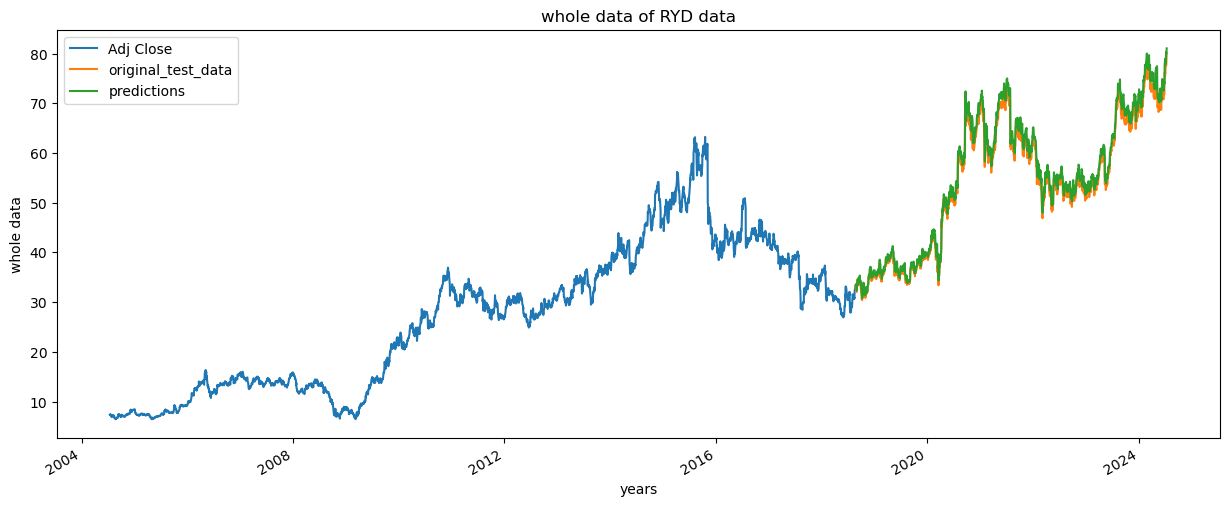

In [57]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [58]:
model.save("Latest_stock_price_model.keras")